To validate Module 1 and correctly answer the questions will require that you perform the following exercise first: take the code in the file named module1.R, and modify it such that (1) the segmentation variable "frequency" is replaced by its log (before it is scaled), and (2) you select a 5-segment solution instead of a 9-segment solution.

You'll be asked to answer these questions :

What is the size of the largest segment?

What is the average purchase amount of the segment which contains, on average, the customers who have made their last purchase the most recently?

Of the five following criteria to determine the best number of segments, which one is the least relevant?

Does customer #260 belongs to the same segment than customer #5920?

Looking at the average profile of segment 1, would you say that members of this segment are typically...(you'll have to choose the right proposition)

## Exporlatory Analysis

In [8]:
# Load text file into local variable called 'data'
data = read.delim(file = 'D:/Data/purchases.txt', header = FALSE, sep = '\t', dec = '.')

In [9]:
# Add headers and interpret the last column as a date, extract year of purchase
colnames(data) = c('customer_id', 'purchase_amount', 'date_of_purchase')
data$date_of_purchase<-as.Date(data$date_of_purchase, "%Y-%m-%d")
data$days_since<-as.numeric(difftime(time1 = "2016-01-01",time2 = data$date_of_purchase,units = "days"))

In [10]:
# Display the data after transformation
head(data)
summary(data)

,customer_id,purchase_amount,date_of_purchase,days_since
1,760,25,2009-11-06,2247.25
2,860,50,2012-09-28,1190.25
3,1200,100,2005-10-25,3720.25
4,1420,50,2009-07-09,2367.25
5,1940,70,2013-01-25,1071.25
6,1960,40,2013-10-29,794.25


  customer_id     purchase_amount   date_of_purchase       days_since     
 Min.   :    10   Min.   :   5.00   Min.   :2005-01-02   Min.   :   1.25  
 1st Qu.: 57720   1st Qu.:  25.00   1st Qu.:2009-01-17   1st Qu.: 733.25  
 Median :102440   Median :  30.00   Median :2011-11-23   Median :1500.25  
 Mean   :108935   Mean   :  62.34   Mean   :2011-07-14   Mean   :1632.19  
 3rd Qu.:160525   3rd Qu.:  60.00   3rd Qu.:2013-12-29   3rd Qu.:2540.25  
 Max.   :264200   Max.   :4500.00   Max.   :2015-12-31   Max.   :4016.25  

## Compute key marketing indicators using SQL language

In [4]:
library(sqldf)

Warning message:
: package 'sqldf' was built under R version 3.2.5Loading required package: gsubfn
Warning message:
: package 'gsubfn' was built under R version 3.2.5Loading required package: proto
Could not load tcltk.  Will use slower R code instead.
Loading required package: RSQLite
Warning message:
: package 'RSQLite' was built under R version 3.2.5Loading required package: DBI
Warning message:
: package 'DBI' was built under R version 3.2.5

In [6]:
# Compute recency, frequency, and average purchase amount
customers = sqldf("SELECT customer_id,MIN(days_since) AS 'recency',COUNT(*) AS 'frequency',AVG(purchase_amount) AS 'amount' 
                    FROM data 
                    GROUP BY 1")

ERROR: Error in sqliteSendQuery(con, statement, bind.data): error in statement: no such column: customer_id


### Explore the Data

In [7]:
# Explore the data
head(customers)
summary(customers)

ERROR: Error in head(customers): object 'customers' not found


### Histograms

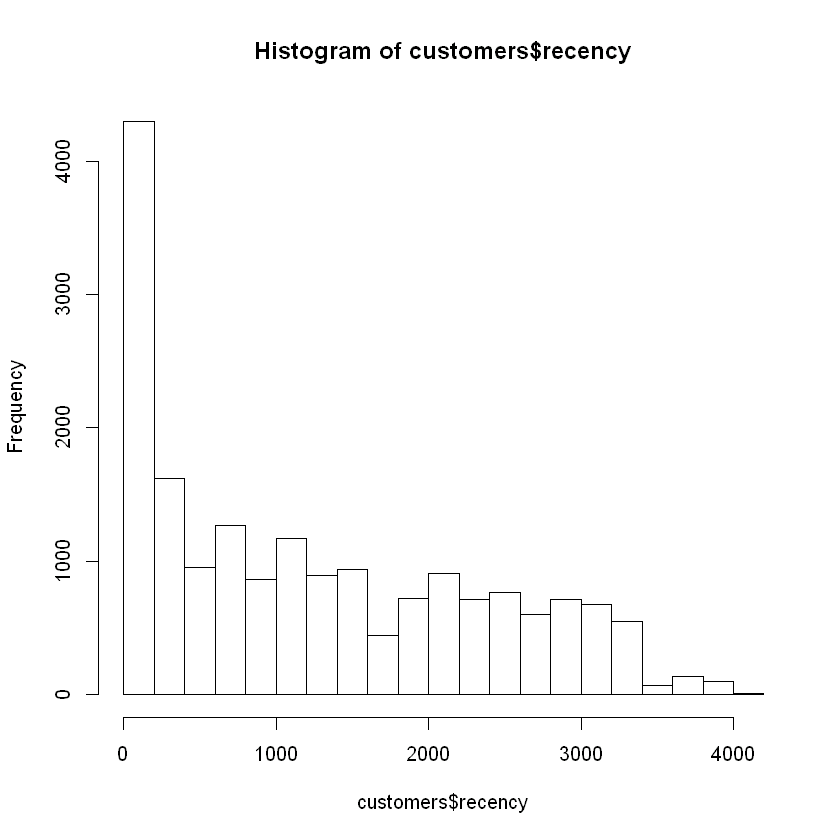

In [27]:
hist(customers$recency)

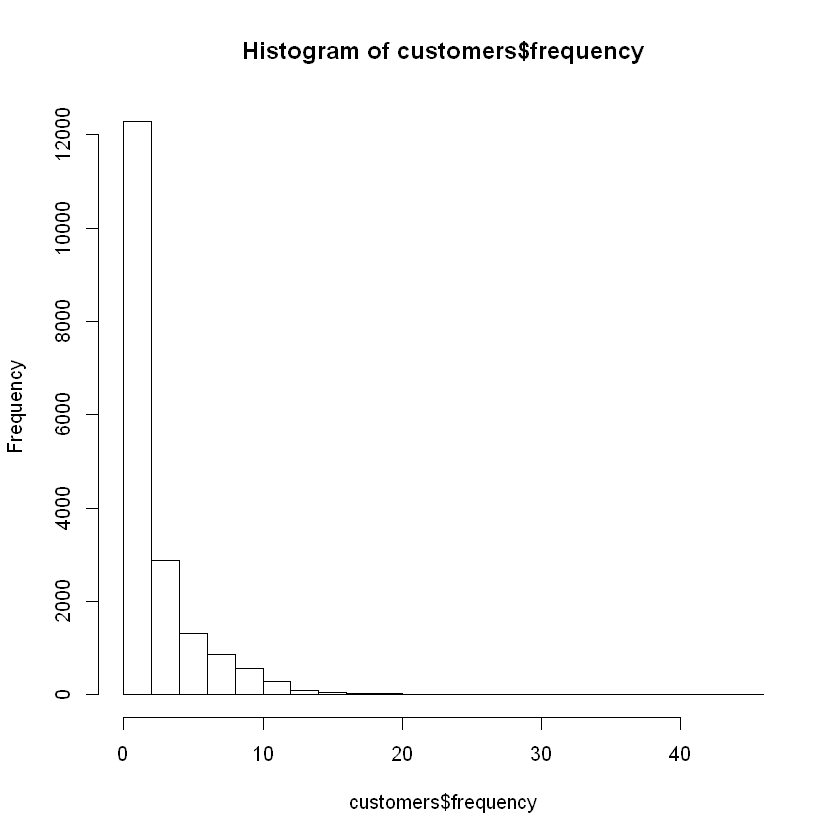

In [28]:
hist(customers$frequency)

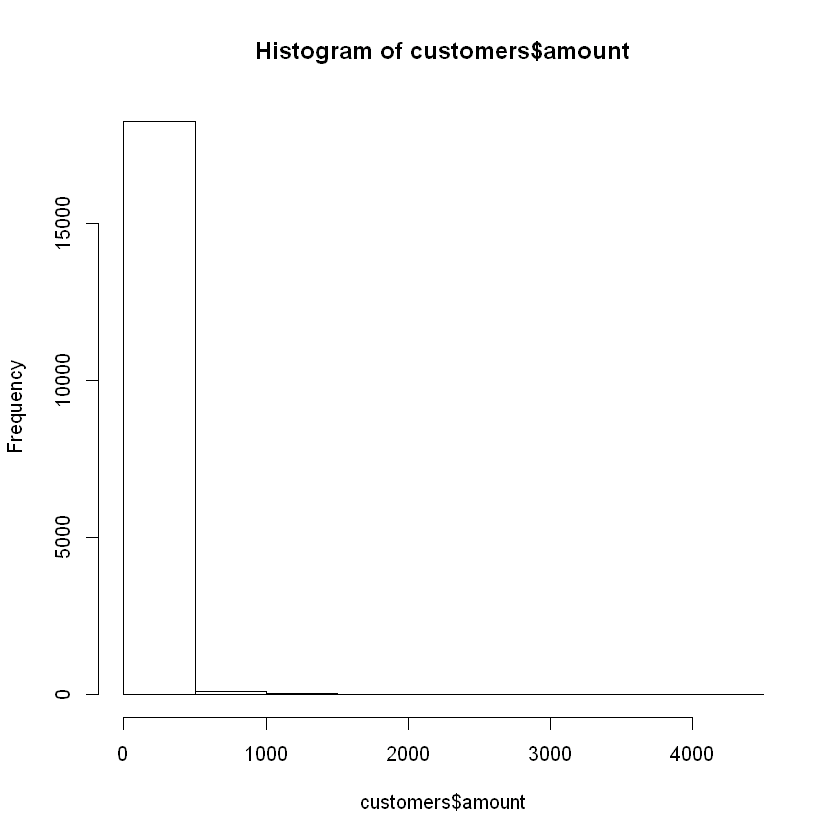

In [29]:
hist(customers$amount)

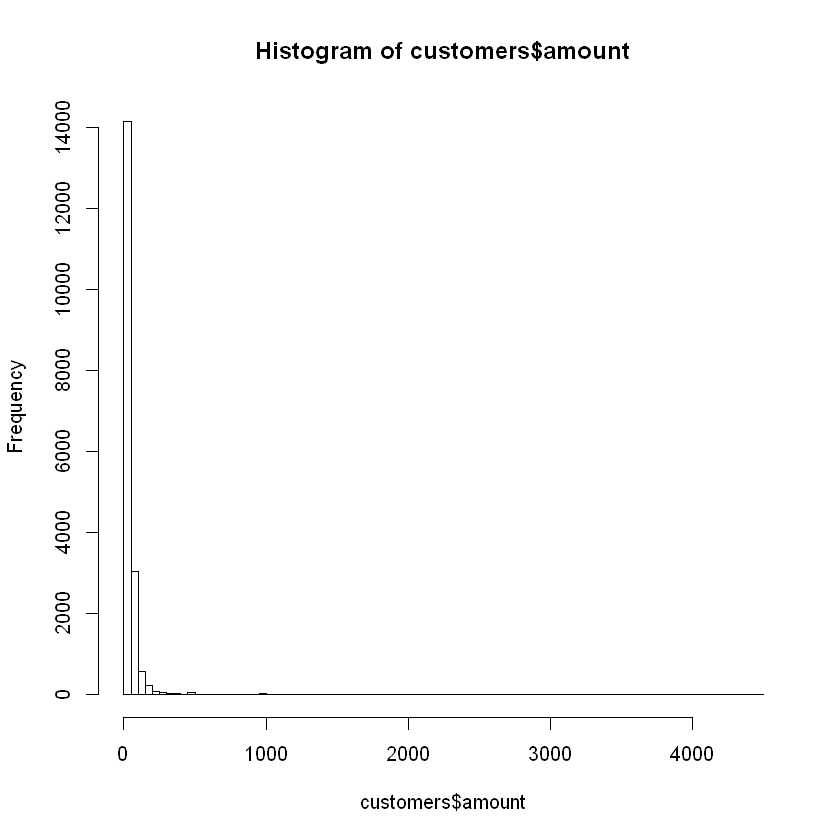

In [30]:
hist(customers$amount, breaks = 100)

## Prepare Data for Clustering

In [31]:
# Copy customer data into new data frame
new_data = customers

# Remove customer id as a variable, store it as row names
head(new_data)
row.names(new_data) = new_data$customer_id
new_data$customer_id = NULL
head(new_data)

,customer_id,recency,frequency,amount
1,10,3829.25,1,30
2,80,343.25,7,71.42857
3,90,758.25,10,115.8
4,120,1401.25,1,20
5,130,2970.25,2,50
6,160,2963.25,2,30


,recency,frequency,amount
10,3829.25,1,30
80,343.25,7,71.42857
90,758.25,10,115.8
120,1401.25,1,20
130,2970.25,2,50
160,2963.25,2,30


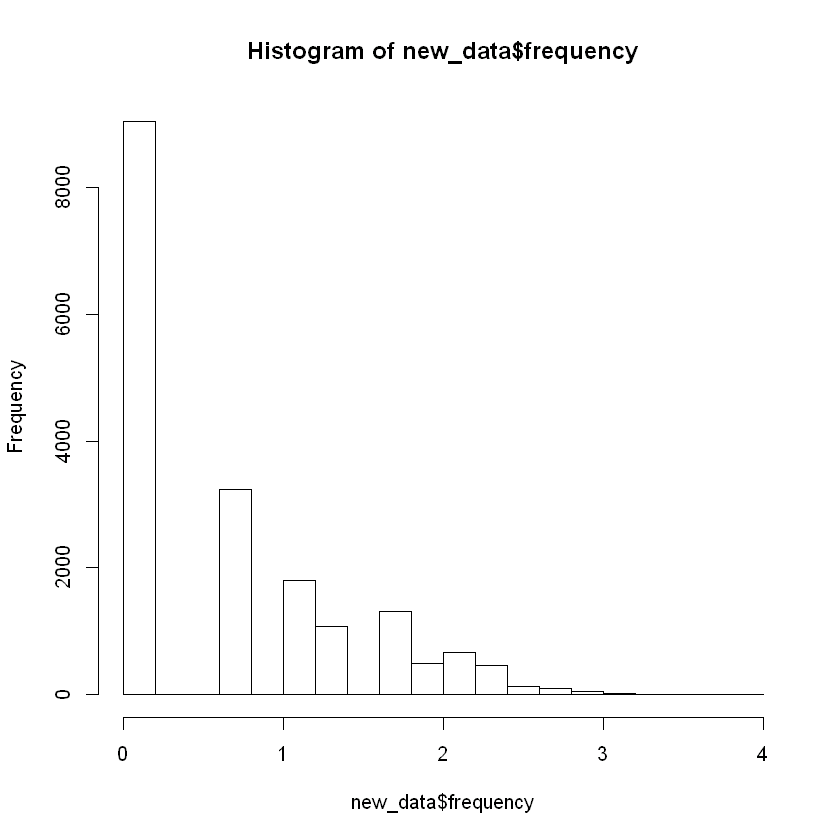

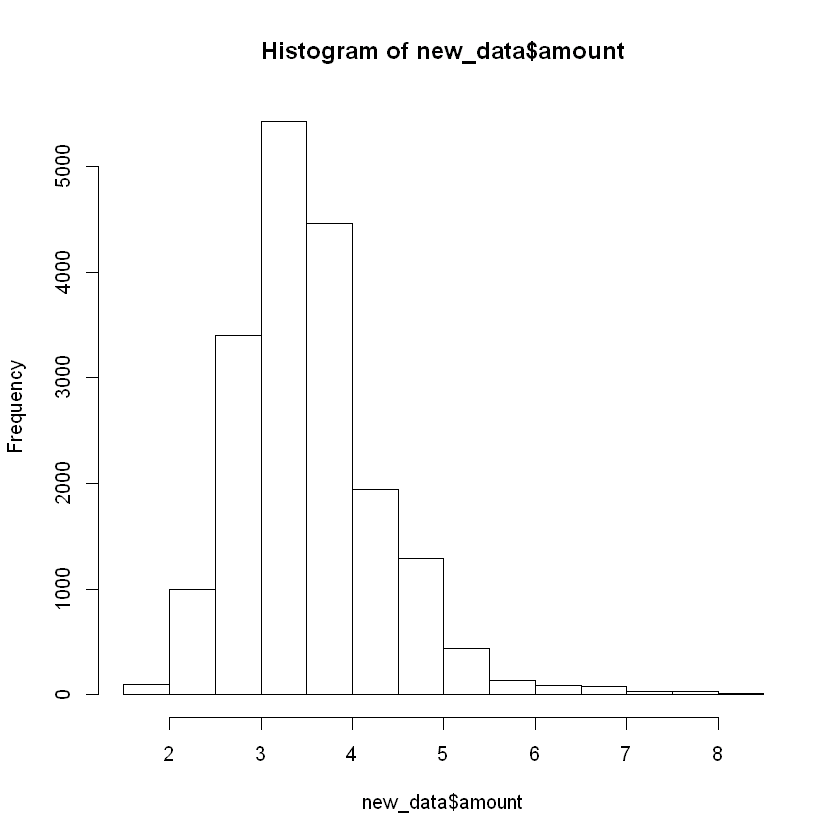

In [32]:
# Take the log-transform of the frequency, and plot
new_data$frequency = log(new_data$frequency)
hist(new_data$frequency)

# Take the log-transform of the amount, and plot
new_data$amount = log(new_data$amount)
hist(new_data$amount)

In [33]:
# Standardize variables
scaled_new_data = scale(new_data)
head(scaled_new_data)

,recency,frequency,amount
10,2.3819788,-0.8536674,-0.2357955
80,-0.8415073,1.6419474,0.8943622
90,-0.457759,2.099380,1.523819
120,0.1368198,-0.8536674,-0.7640251
130,1.58766597,0.03528851,0.42969516
160,1.58119310,0.03528851,-0.23579547


## HIERARCHICAL SEGMENTATION 

In [34]:
# Compute distance metrics on standardized data

# This will likely generate an error on most machines
# d = dist(new_data)

# Take a 10% sample
sample = seq(1, 18417, by = 10)
# head(sample)
customers_sample = customers[sample, ]
new_data_sample  = scaled_new_data[sample, ]

In [35]:
# Compute distance metrics on standardized data
d = dist(new_data_sample)

# Perform hierarchical clustering on distance metrics
c = hclust(d, method="ward.D2")

In [36]:
min(data[,1])

[1] 10

### Plot

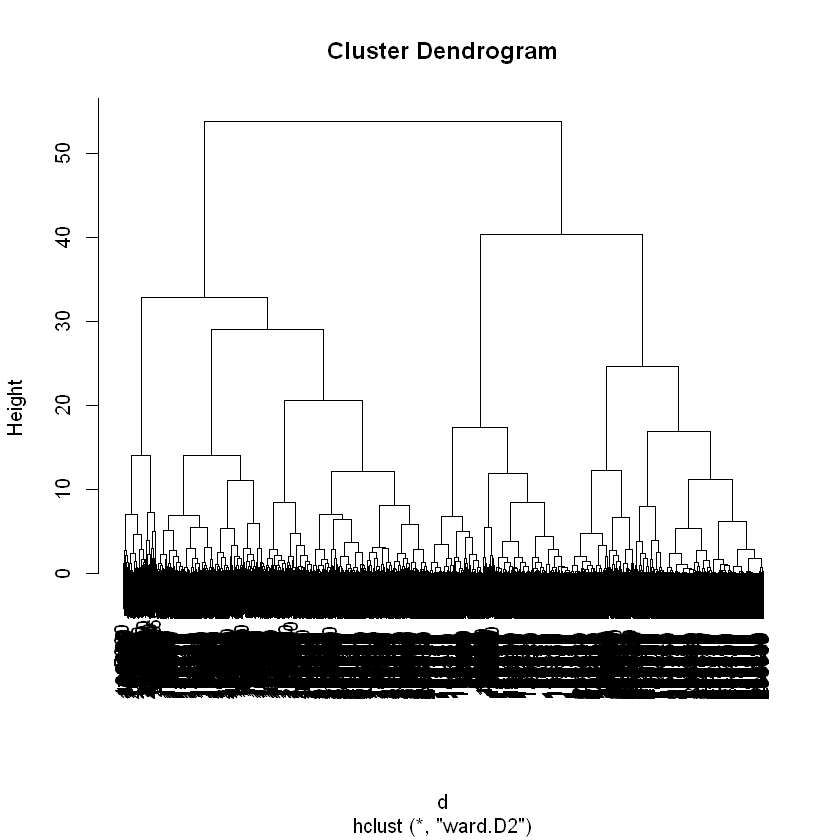

In [37]:
# Plot de dendogram
plot(c)

In [38]:
# Cut at 9 segments
members = cutree(c, k = 5)

# Show 30 first customers, frequency table
members[1:30]
table(members)

10  260  510  850 1040 1430 1860 2160 2380 2700 3000 3140 3650 3920 4240 4470 
   1    1    1    2    2    3    4    5    2    3    3    1    2    1    1    2 
4710 4910 5230 5520 5710 5920 6080 6240 6410 6600 6750 6940 7100 7330 
   5    3    2    1    1    5    3    1    3    3    2    2    3    3

members
  1   2   3   4   5 
408 470 314 555  95 

In [39]:
# Show profile of each segment
aggregate(customers_sample[, 2:4], by = list(members), mean)

,Group.1,recency,frequency,amount
1,1,2757.468,1.117647,35.00041
2,2,305.6011,5.306383,38.29947
3,3,1828.572,3.426752,32.01873
4,4,758.8878,1.113514,45.24456
5,5,606.8289,5.494737,311.2696


In [45]:
members['5920']

5920 
   5